In [408]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
data = pd.read_excel("merged_data.xlsx",sheet_name="asi").dropna()

In [410]:
data = data.fillna(value=data.mean())

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 298 to 3059
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fitur_1  412 non-null    float64
 1   fitur_2  412 non-null    float64
 2   fitur_3  412 non-null    float64
 3   target   412 non-null    float64
dtypes: float64(4)
memory usage: 16.1 KB


In [412]:
x, y = data[data.columns[:-1]], data[data.columns[-1]]

In [413]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [414]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [415]:
regr.predict(X_test)

array([16.1924633 , 15.67200165, 25.24483941, 20.44500493, 27.92803287,
       47.8597568 , 15.37787747, 15.72211463, 27.42366246, 19.29125231,
       15.67227494, 37.79517585, 14.78751786, 15.76489014, 15.49840298,
       38.0111039 , 15.3370478 , 16.27617892, 16.96313033, 15.50144018,
       43.13231218, 28.26291254, 15.70789173, 19.4335031 , 24.64694595,
       16.83781645, 17.71798158, 20.03592739, 25.99889581, 19.56401209,
       39.52775045, 36.86039497, 32.53945294, 21.16047645, 15.54884373,
       26.38365723, 16.72677752, 17.85822421, 18.49580123, 15.82540442,
       15.82389154, 18.1910344 , 17.31121769, 19.92092694, 16.19380884,
       15.62417091, 15.54542627, 32.45611368, 26.56824907, 25.2357762 ,
       15.080435  , 18.01414004, 22.47395491, 15.48125136, 16.60835889,
       17.26818268, 15.48426779, 15.08339374, 17.38184696, 15.86101577,
       19.36340368, 15.66798507, 15.6293441 , 16.11280807, 20.99856496,
       38.27468437, 25.31067795, 16.81004256, 23.1071645 , 15.66

In [416]:
regr.score(X_test, y_test)

0.4791969178098805

In [417]:
regr.score(X_train, y_train)

0.5118372711163262

<Figure size 1000x800 with 0 Axes>

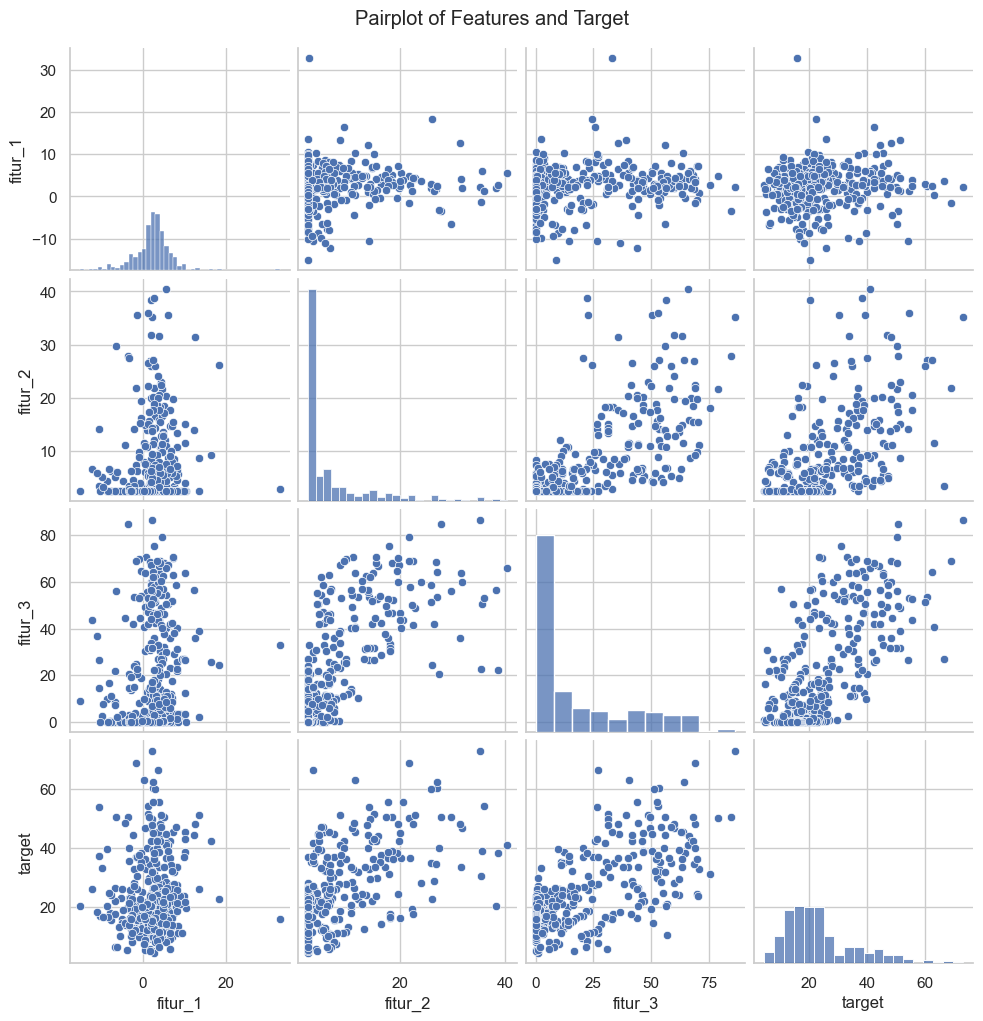

In [418]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a pairplot to visualize the relationships between features and target
plt.figure(figsize=(10, 8))
sns.pairplot(data[['fitur_1', 'fitur_2', 'fitur_3', 'target']])
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

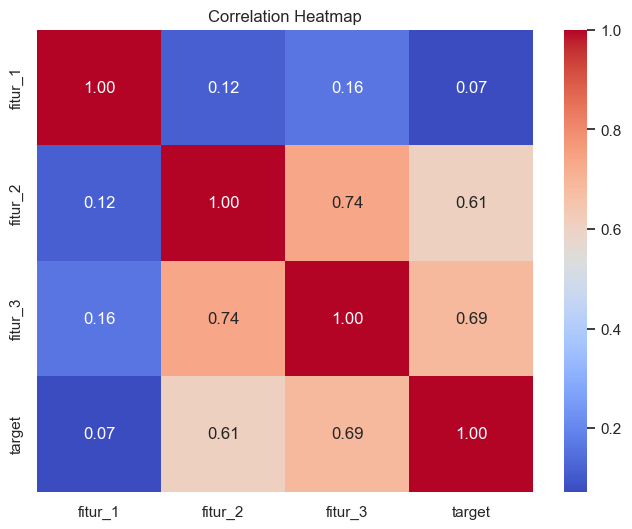

In [419]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = data[['fitur_1', 'fitur_2', 'fitur_3', 'target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [420]:
data_predict = pd.read_excel("prediction.xlsx",sheet_name="Sheet1")

In [421]:
data_predict = data_predict.fillna(0)

In [422]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   negara   146 non-null    object 
 1   fitur_1  146 non-null    float64
 2   fitur_2  146 non-null    float64
 3   fitur_3  146 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


In [423]:
x_pred = data_predict[data_predict.columns[1:]]

In [424]:
y_pred = regr.predict(x_pred)

In [425]:
y_pred

array([60.65884993, 18.01378817, 17.70108849, 44.57508078, 19.23783626,
       21.82294961, 16.64083161, 16.3186138 , 32.15172323, 16.83358691,
       15.60676735, 35.48620544, 35.63987037, 17.05359658, 30.42277602,
       17.10919351, 51.35732528, 40.47675023, 28.22451232, 24.43783111,
       48.76011483, 56.73750062, 15.37576504, 22.02265796, 18.79807578,
       35.50016713, 51.27493253, 15.80481398, 29.5779708 , 18.00663616,
       16.56706844, 15.59017143, 51.06169532, 15.50999407, 31.98828637,
       17.3116127 , 36.21223348, 19.3513044 , 19.04335697, 15.69959973,
       26.3204985 , 41.65167949, 32.45215131, 15.54542627, 15.53520018,
       33.23503326, 30.50028109, 21.27616014, 15.44931084, 24.73341401,
       17.37351709, 27.54037106, 29.14732565, 44.41274955, 59.4679542 ,
       31.26995424, 15.44931084, 17.51657582, 29.52229697, 20.68486242,
       31.85946804, 18.37713145, 16.32331367, 19.32181944, 23.55913411,
       15.39603798, 36.77308296, 16.51445884, 19.02627942, 31.79

In [426]:
temp = pd.Series(y_pred,)

In [427]:
temp.name = "2023"

In [428]:
temp

0      60.658850
1      18.013788
2      17.701088
3      44.575081
4      19.237836
         ...    
141    25.700143
142    25.431825
143    30.532685
144    35.428460
145    32.523881
Name: 2023, Length: 146, dtype: float64

In [429]:
temp_df = pd.DataFrame([data_predict["negara"],temp])

In [430]:
temp_df = temp_df.T

In [431]:
temp_df.columns = ["GeoAreaName","2023"]

In [432]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GeoAreaName  146 non-null    object
 1   2023         146 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [433]:
target_df = pd.read_excel("target.xlsx",sheet_name="Table format")

In [434]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               156 non-null    int64  
 1   Target             156 non-null    float64
 2   Indicator          156 non-null    object 
 3   SeriesCode         156 non-null    object 
 4   SeriesDescription  156 non-null    object 
 5   GeoAreaCode        156 non-null    int64  
 6   GeoAreaName        156 non-null    object 
 7   Age                0 non-null      float64
 8   Location           156 non-null    object 
 9   Reporting Type     156 non-null    object 
 10  Sex                0 non-null      float64
 11  Units              156 non-null    object 
 12  2000               16 non-null     float64
 13  2001               15 non-null     float64
 14  2002               17 non-null     float64
 15  2003               18 non-null     float64
 16  2004               30 non-

In [435]:
target_df = target_df.drop(columns=["Goal","Target","Indicator","SeriesCode","SeriesDescription","GeoAreaCode","Age","Location","Reporting Type","Sex","Units"])

In [436]:
target_df = target_df.fillna(0)

target_df = target_df[target_df["2022"]!=0]

In [437]:
target_df = pd.merge(target_df,temp_df,on="GeoAreaName",how="inner")

In [438]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaName  30 non-null     object 
 1   2000         30 non-null     float64
 2   2001         30 non-null     float64
 3   2002         30 non-null     float64
 4   2003         30 non-null     float64
 5   2004         30 non-null     float64
 6   2005         30 non-null     float64
 7   2006         30 non-null     float64
 8   2007         30 non-null     float64
 9   2008         30 non-null     float64
 10  2009         30 non-null     float64
 11  2010         30 non-null     float64
 12  2011         30 non-null     float64
 13  2012         30 non-null     float64
 14  2013         30 non-null     float64
 15  2014         30 non-null     float64
 16  2015         30 non-null     float64
 17  2016         30 non-null     float64
 18  2017         30 non-null     float64
 19  2018      

In [439]:
kenaikan = target_df["2023"].to_numpy() - target_df["2022"].to_numpy()

In [440]:
kenaikan = pd.DataFrame(kenaikan,columns=["kenaikan"])

In [441]:
kenaikan

,kenaikan
0,-19.962164
1,-2.97705
2,13.451723
3,3.306767
4,-3.490806
5,8.875765
6,-17.801924
7,-9.695186
8,11.012233
9,-7.556643


In [442]:
target_df = pd.concat([target_df,kenaikan],axis=1)

In [443]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaName  30 non-null     object 
 1   2000         30 non-null     float64
 2   2001         30 non-null     float64
 3   2002         30 non-null     float64
 4   2003         30 non-null     float64
 5   2004         30 non-null     float64
 6   2005         30 non-null     float64
 7   2006         30 non-null     float64
 8   2007         30 non-null     float64
 9   2008         30 non-null     float64
 10  2009         30 non-null     float64
 11  2010         30 non-null     float64
 12  2011         30 non-null     float64
 13  2012         30 non-null     float64
 14  2013         30 non-null     float64
 15  2014         30 non-null     float64
 16  2015         30 non-null     float64
 17  2016         30 non-null     float64
 18  2017         30 non-null     float64
 19  2018      

In [444]:
target_df = target_df.sort_values(by="kenaikan",ascending=False)

In [445]:
target_df

,GeoAreaName,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,kenaikan
28,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.2,7.9,6.8,5.7,4.8,0.0,4.3,25.431825,21.131825
24,Sweden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,14.4,...,16.2,15.8,16.4,17.1,16.1,15.7,16.0,16.1,33.608008,17.508008
2,Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,32.151723,13.451723
13,Indonesia,19.1,18.4,18.2,17.4,16.7,16.0,17.8,16.6,15.4,...,11.2,10.9,10.6,9.8,9.4,9.8,10.1,9.5,20.684862,11.184862
8,Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.7,35.1,...,23.3,22.9,21.5,23.2,25.0,33.0,27.7,25.2,36.212233,11.012233
14,Kazakhstan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.3,4.3,5.3,5.2,5.2,15.396038,10.196038
5,Chile,36.0,0.0,0.0,35.4,0.0,0.0,29.1,0.0,0.0,...,11.7,0.0,8.6,0.0,0.0,10.8,0.0,6.5,15.375765,8.875765
26,Uruguay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,17.230824,7.330824
12,Georgia,0.0,0.0,0.0,0.0,0.0,0.0,36.9,38.8,34.9,...,21.6,22.0,21.9,20.1,19.5,21.3,17.5,15.6,21.27616,5.67616
11,Finland,0.0,0.0,0.0,11.0,11.7,12.6,13.0,13.6,13.8,...,11.6,11.5,12.0,11.6,12.2,10.8,12.7,12.2,15.545426,3.345426


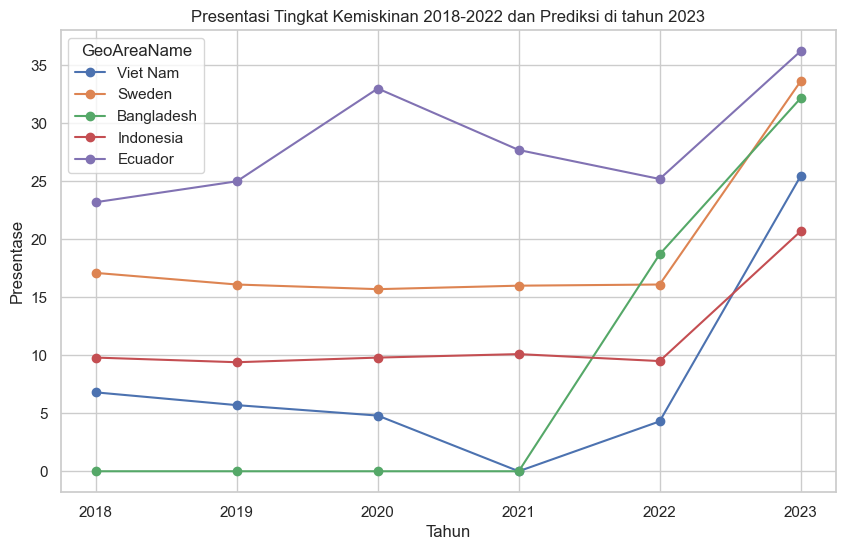

In [446]:

top_5 = target_df.head(5)

plt.figure(figsize=(10,6))

for area in top_5['GeoAreaName']:
    subset = target_df[target_df['GeoAreaName'] == area]
    plt.plot(['2018', '2019', '2020', '2021', '2022', '2023'], 
             subset[['2018', '2019', '2020', '2021', '2022', '2023']].values[0],
             marker='o', label=area)

plt.title('Presentasi Tingkat Kemiskinan 2018-2022 dan Prediksi di tahun 2023')
plt.xlabel('Tahun')
plt.ylabel('Presentase')
plt.legend(title='GeoAreaName')
plt.grid(True)


plt.show()